In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Алгоритмы кластеризации</b></h3>

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
 <li><b>Регрессия</b> - задача о предсказывании конкретного значения, но основе заданных параметров.</li>
 <li><b>Кластеризация</b>  - задача об объединении объектов в группы по каким-то уникальным общим свойствам/на основе каких-то закономерностях данных.</li>

</ul>
</div>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"><li>Постановка задачи кластеризации.</li>
            <li><a href="#2">Алгоритмы кластеризации</a>
                <ul><li><a href="#2">K-means</a></li> <li><a href="#3">Иерархическая кластеризация</a></li> <li><a href="#4">DBSCAN</a></li> <li><a href="#5">Affinity propagation</a></li></ul>
            <li><a href="#6">Метрики качества кластеризации</a></li>
   
    

    
</font></p>

<h2>Постановка задачи кластеризации</h2>
<p style="align: center;"><img align=center id="1" src="https://sun9-56.userapi.com/impg/jvoMdfrv_AoGzyknSStx57s89-G4gJKUQuCVqA/OI0-CP5BEck.jpg?size=653x508&quality=96&proxy=1&sign=bd8a0e2aab0a9db737b825d2492ed28a&type=album"  width=900></p>

<p>Имеется множество $X$ - множество, где $n$ - кол-во объектов, $k$ - признаков. Задача состоит в том, чтобы отобразить множество  $X$  на множество $y$ - меток. Т.е. каждому объекту поставить в соответствие (пару) метку кластера так, чтобы <b>близкие</b> (в смысле расстояния) объекты лежали в одном кластере, а далекие - в разных. </p> Имеем отображение (функция расстояния) $\rho : X \times X \rightarrow [0,\infty) $
$$X^{n\times k} \rightarrow y^{n \times 1}$$
</p>
Заметим, что в данном виде математически задача некорректна, в ней много неоднозначности, и в каждом конкретном случае условия для поставновки задачи могут быть разные.
Рассмотрим разные типы класстеризации. 
<div class="alert alert-info">
<h3>Типы кластеризации</h3>
<ul>
    <li><b>Жесткая</b> кластеризация (один объект может принадлежать только одному классу)</li>
<li><b>Мягкая</b> кластеризация (один объект может принадлежать нескольким классам или не принадлежать совсем)</li>
    <li><b>Иерархическая</b> кластеризация (объект внутри кластера 2.1 находится внутри кластера 2)</li>
</ul></div

<h2>Алгоритмы кластеризации</h2>
<h3 id="2">
Метод k-средних</h3>
<p style="align: center;"><img id="2" align=center src="https://datascience.eu/wp-content/uploads/2019/12/Screenshot-2020-10-17-at-13.30.08-978x652.png"  width=900></p>

<p>Метод k-средних (англ. K-means) заключается в том, чтобы минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.
$$\sum\limits_{i=0}^n \min\limits_{\mu_j} (||x_i - \mu_j||)^2$$
    Для начала нужно задать начальные значения центров кластеров. Затем <b>считать до тех пор, пока</b> центры смещаются: присвоить наблюдениям номер кластера с <b>ближашим</b> к ним центром, передвинуть центры кластеров к среднему значению координат объектов кластера.</p>

 <div class="alert alert-info"><h3>Ограничения</h3>
 Алгоритм может выдавать контринтуитивные результаты:
 <ol>
    <li>Если указано не то число кластеров.</li>
<li>Кластеры не выпуклые и близко расположены.</li>
    <li>Разная дисперсия близких кластеров.</li>
</ol>
<p style="align: center;"><img align=center src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png"  width=900></p></div>

Рассмотрим метод на практике.

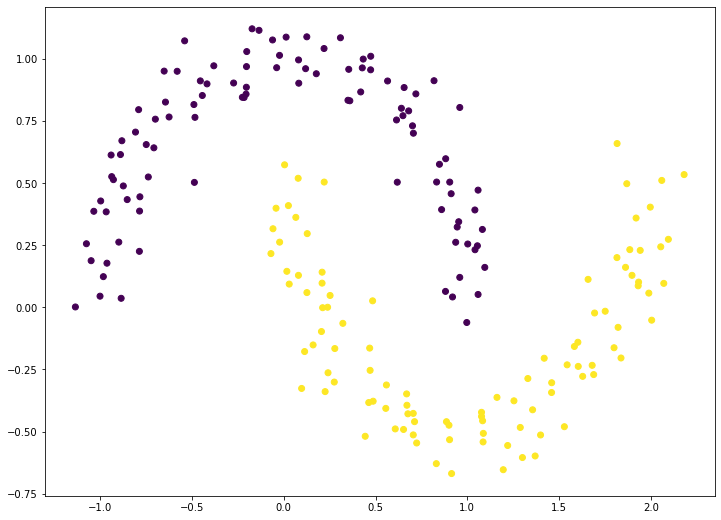

In [2]:
# подгружаем один из набиолее популярных для обучения датасетов из полумесяцев
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.1) #задаем 200 объектов

plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

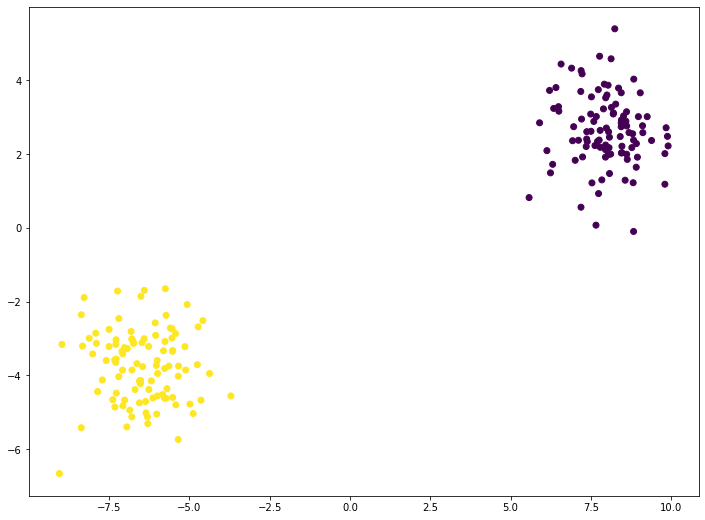

In [3]:
# импортируем второй датасет с двумя четко выраженными кластерами
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=200, centers=2)

plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs)
plt.show()

<p>Реализуем свой метод K-means на 100 эпох следующим образом:</p>

In [4]:
def distance(point1, point2): # функция расстояния
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1] - point2[1])**2)

def MyKMeans(X, n_clusters, as_generator=False):
    centroids = X[np.random.choice(list(range(len(X))), n_clusters)] # случайные выбираем точки для центров
    n_epochs = 100 # кол-во эпох
    
    for _ in range(n_epochs):
        #1. Cчитаем расстояния до кластеров
        belonging = []
        for sample in X:
            distances = []
            for center in centroids:
                distances.append(distance(sample, center))
            belonging.append(distances)
                
        #2. Определяем принадлежность кластерам
        belonging = np.array(belonging)
        belonging = np.argmin(belonging, axis=1) # позиция минимума
        
        #3. Перерасчитываем центры
        new_centroids = []
        for c in range(n_clusters):
            points = X[belonging==c]
            new_centroids.append(points.mean(axis=0))
        centroids = np.array(new_centroids)
        
        if as_generator:
            yield belonging, centroids # возвращаем генератор
    yield belonging, centroids
    

In [5]:
y_pred, centers = next(MyKMeans(X_blobs, 2)) # передаем 2 кластера

<p>Итого имеем кластеризацию на два кластера c правильными центрами:</p>

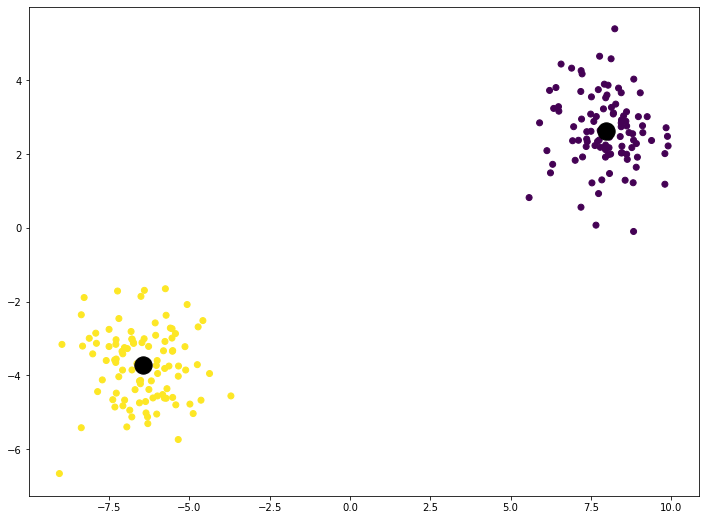

In [6]:
plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs)
plt.scatter(centers[:,0], centers[:,1], c='black', s=300)
plt.show()

То же самое для полумесяцев

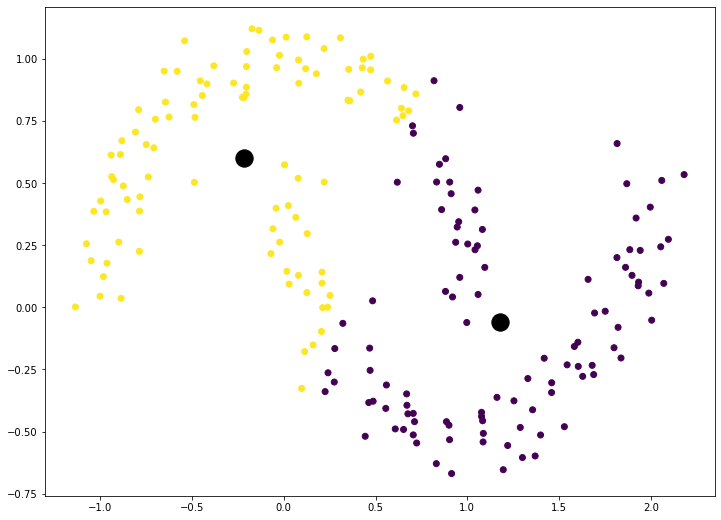

In [7]:
y_pred_moons, centers_moons = next(MyKMeans(X_moons, 2))
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_pred_moons)
plt.scatter(centers_moons[:,0], centers_moons[:,1], c='black', s=300)
plt.show()

Сделаем неправильное кол-во кластеров для полумесяцев. K-means будет также работать исправно.

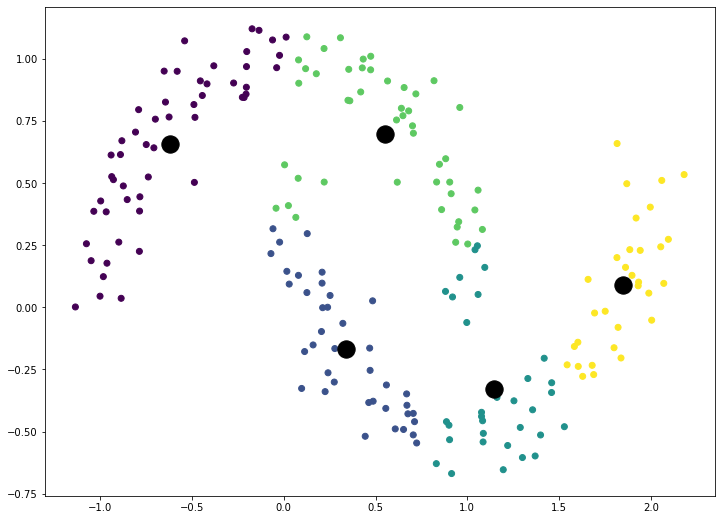

In [8]:
moons_gen = MyKMeans(X_moons, 5, True)
y_pred, centers = next(moons_gen)
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_pred)
plt.scatter(centers[:,0], centers[:,1], c='black', s=300)
plt.show()

<div class="alert alert-info"><h4><i>Как же выбрать правильное кол-во кластеров?</i></h4>
<p>Используем локтевой метод (или по-простому "метод локтя"). Перебираем от 1 до N кластеров, считаем внутрикластерное расстояние и в какой-то момент  качество перестанет быстро улучшаться - это и есть <b>оптимальное</b> количество кластеров.</p></div>
<p style="align: center;"><img align=center src="https://ranalytics.github.io/data-mining/101-Partitioning-Algos_files/figure-html/fig-10-1-1.png"  width=900></p></div>

<h3>Иерархическая кластеризация</h3>
<p id="3">Рассмотрим следующий алгоритм кластеризации - иерархическую кластеризацию. Суть метода заключается в следующем: изначально предполагается, что каждый объект принадлежит какому-то своему кластеру, а затем максимально близкие точки сливаются в "объединения", и это продолжается до тех пор пока не образуется один большой гиперкластер. Иллюстрация метода в виде дерева:  </p>
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/1024px-Hierarchical_clustering_simple_diagram.svg.png"  width=900></p></div>

Построим данный метод (его дендрограмму) на примере.

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

Метод <b>linkage</b> строит матрицу связей. Ему передается на вход матрица  X и метод определения близости между кластерами. На выходе получаем объект связей - <b>дендрограмму</b>.

In [11]:
Z = linkage(X_blobs, 'ward') # здесь используем расстояния по Уорду, о нем позднее

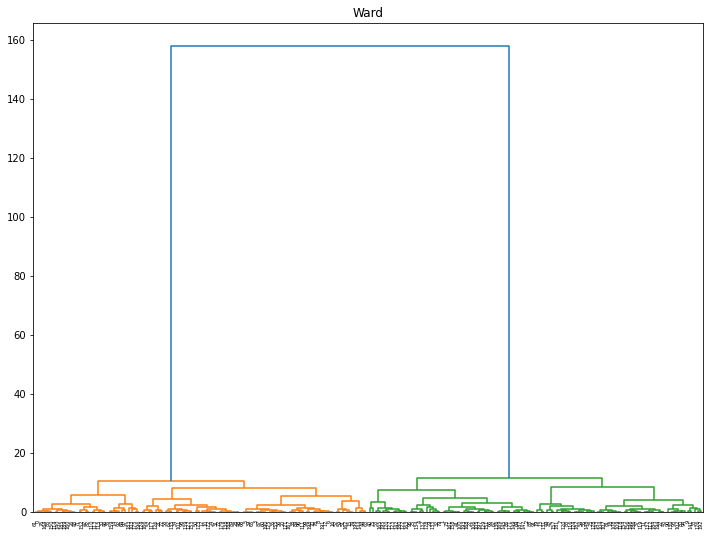

In [12]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z)
plt.show()

<div class="alert alert-info"><h4><i>Как считаем расстояние между кластерами?</i></h4>
<p> Расстояние между кластерами базируется на расстоянии между двумя точками, которое может быть выбрано как в норме L1, L2, cos и т.д.
Если известно расстояние между двумя точками, то есть несколько самых интуитивных и эффективных подходов. 
<ol>
    <li>Расстояние ближнего соседа</li>
<li>Расстояние дальнего соседа</li>
<li>Групповое расстояние</li>
<li>Расстояние между центрами</li>
<li>Расстояние Уорда</li></ol>
</p></div>

<b><p>1. Метод ближнего соседа.</p></b><b></b>
<p>Берем все попарные расстояния между всеми точками в кластерах и считаем из них минимум. Получаем оценку насколько близки два кластера друг к другу.</p>
$$R^{б}(W,S) = \min\limits_{w, s}\rho(w,s)$$
<p style="align: center;"><img align=center src="https://sun9-36.userapi.com/impg/bcjD2Z4qGgPwghDryeZbgSHc4bfFgqug5uK8sw/x3tC2C7sXuQ.jpg?size=988x225&quality=96&proxy=1&sign=8f51501f7e5f6bd7b443cd6308272fb9&type=album"  width=900></p></div>
<b><p>2. Метод дальнего соседа.</p></b>
<p>Аналогично берем все попарные расстояния между всеми точками в кластерах и считаем из них максимум. Получаем оценку насколько сильно разнятся самые дальние объекты кластеров.</p>
$$R^{д}(W,S) = \max\limits_{w, s}\rho(w,s)$$
<p style="align: center;"><img align=center src="https://sun9-8.userapi.com/impg/1KP_j94TIXxVfGs1bIevY0iYsporwmPeSAJL-Q/_5lW18OUn0M.jpg?size=1024x215&quality=96&proxy=1&sign=11ac311bf0487115787897dfa666fa98&type=album"  width=900></p></div>
<b><p>3. Метод группового среднего.</p></b>
<p>Суммируем все попарные расстояния между точками и делим на кол-во этих попарных расстояний. Получаем в итоге "усредненное" расстояние между точками.</p>
$$R^{г}(W,S) = \frac{1}{|W|\cdot|S|}\sum\limits_{w}\sum\limits_{s}\rho(w,s)$$
<b><p>4. Расстояние между центрами кластеров.</p></b>
<p>Если удается найти центры масс кластеров, то можно найти расстояние между ними. </p>
$$R^{ц}(W,S) = \rho^2 \left( \sum\limits_{w}\frac{w}{|W|},\sum\limits_{s}\frac{s}{|S|}\right)$$
<b><p>5. Расстояние Уорда.</p></b>
<p>Берем расстояние между центрами кластеров и довзвешиваем его на среднее гармоническое. Это самый универсальный метод и наиболее эффективный во многих задачах.</p>
$$R^{у}(W,S) = \frac{|W|\cdot|S|}{|W|+|S|}\rho^2 \left( \sum\limits_{w}\frac{w}{|W|},\sum\limits_{s}\frac{s}{|S|}\right)$$

Посмотрим на практике.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
Z_blobs = linkage(X_blobs, 'ward') # считаем методом Уорда для блобов и полумесяцев
Z_moons = linkage(X_moons, 'ward')
Z_moons_s = linkage(X_moons, 'single') # считаем методом single = минимальное расстояние между точками кластеров

Получаем дендрограмму для блобов, видим 2 очевидных кластера.

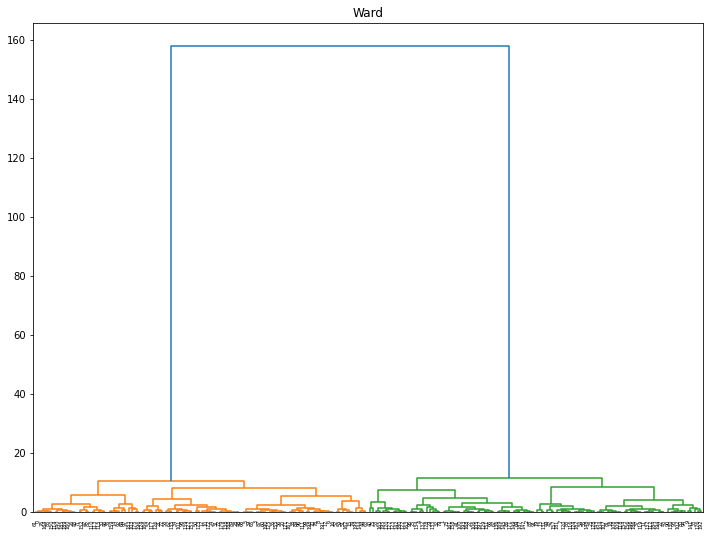

In [15]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z_blobs)
plt.show()

Аналогично получаем дендрограмму для полумесяцев, видим что картина уже не такая очевидная. 2 кластера.

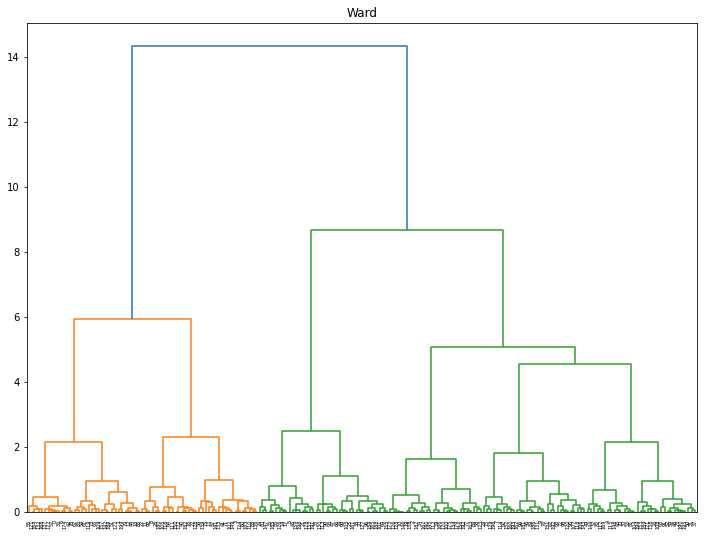

In [16]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z_moons)
plt.show()

То же самое для полумесяцев, но методом single. Получаем еще более неочевидную картину.

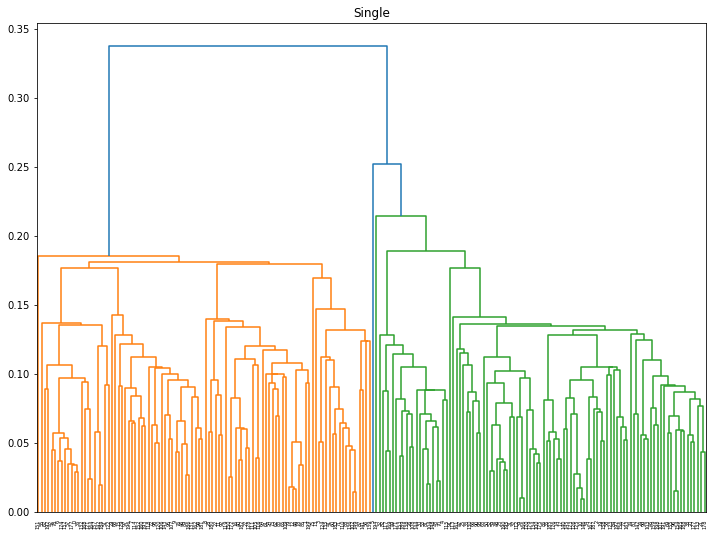

In [17]:
plt.figure(figsize=(12,9))
plt.title('Single')
dendrogram(Z_moons_s)
plt.show()

<h3>DBSCAN</h3>
<p id="4">Рассмотрим следующий алгоритм кластеризации - "Density-Based Spatial Clustering of Applications with Noise". Данный алгоритм рассматривает объекты как ядра вокруг которых собираются другие объекты. Если не собираются, то алгоритмы считает это выбросом. Если ядра связаны - то они и достижимые из них объекты образуют кластер. Плюсом данного метода является то, что не нужно указывать кол-во кластеров.</p>
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/1024px-DBSCAN-density-data.svg.png"  width=900></p>
<div class="alert alert-info"><p>Таким образом все точки делятся на 3 типа:
                    <ul><li>Ядра (в eps-окрестности >= N точек) </li>
<li>Достижимые из ядра (в eps-окрестности < N точек, > 0 ядер)</li>
<li>Выбросы (отдельные)</li>
</ul>



</p></div>

Теперь расмотрим алгоритм на практике, на примере полумесяцев.

In [18]:
from sklearn.cluster import DBSCAN

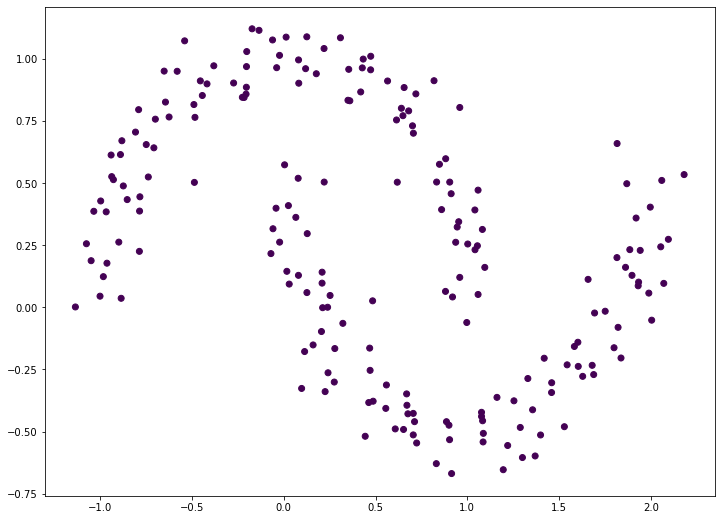

In [19]:
scan_moons = DBSCAN() # если запустить метод без указания eps то все точки в один кластер
y_moons = scan_moons.fit_predict(X_moons)
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

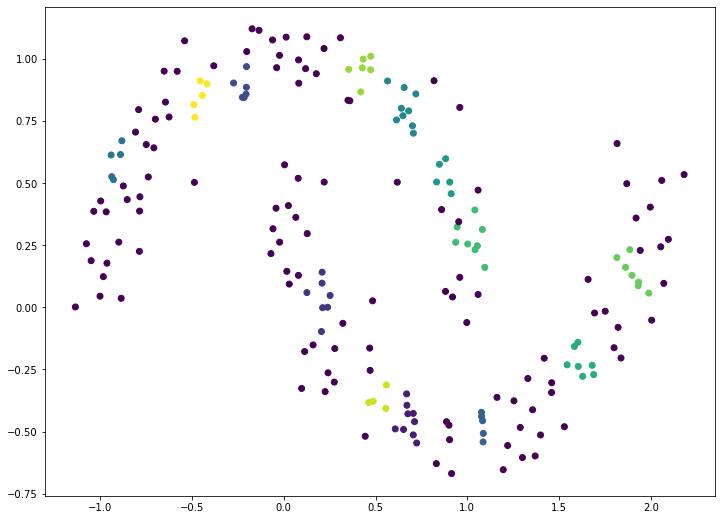

In [20]:
scan_moons = DBSCAN(eps=0.1)# указываем eps
y_moons = scan_moons.fit_predict(X_moons)
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

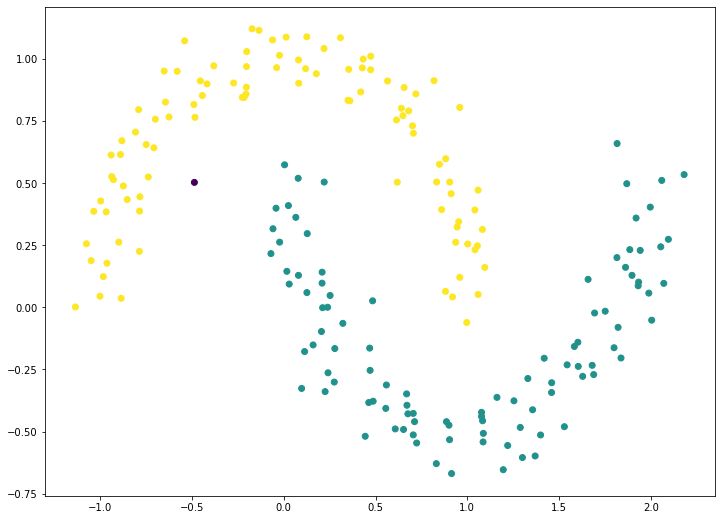

In [21]:
scan_moons = DBSCAN(eps=0.25) # путем подбора правильного eps приходим к верному кол-ву кластеров
y_moons = scan_moons.fit_predict(X_moons)
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

<h3>AFFINITY PROPAGATION</h3>
<p id="5">Идея алгоритма заключается в том, что все объекты обмениваются двумя видами сообщений:
     <ul><li>насколько объект 1 готов быть экземпляром объекта 2</li>
<li>насколько объект 2 готов предоставить право объекту 1 быть своим экземпляром</li>

</ul>
<p style="align: center;"><img align=center src="https://miro.medium.com/max/667/1*F6F5G6Bb1KpNtgKZFzJ_fw.png"  width=900></p>
Подробнее об этом алгоритме со сложной математической точки зрения можно прочитать <a href="https://habr.com/ru/post/321216/">здесь</a>.

<div class="alert alert-info"><h3>Метрики качества кластеризации</h3>
<p id="6">Все популярные метрики качества делятся на два типа. Если реальные классы известны, то ARI (Adjusted Rand Index). Если неизвестны - Silhouette. </p>
<h4>Adjusted Rand Index</h4>
Основную идею можно прочитать на <a href="https://en.wikipedia.org/wiki/Rand_index/">википедии</a>.
<p>В данной метрике у нас есть $y_{true}$ - вектор меток реальных классов. $y_{pred}$ - то, что мы предсказали в результате кластеризации. $ARI \in
[0,1]$, где 0 - случайное разбиение кластеров, 1 - точное соответствие. При этом метрике не важны названия кластеров, т. е. по сути данная метрика  - есть аналог accuracy.</p>
<h4>Silhouette (силуэт)</h4>
<p>Эта метрика работает, если первоначально нет знания правильных классов. Суть заключается в оценке, насколько сильно один объект сидит внутри своего кластера и далеко от ближайшего соседа:
$$s = \frac{b-a}{max(a,b)},      S=mean(s)$$
где a - среднее расстояние до объектов внутри кластера, b - среднее расстояние до объектов ближайшего кластера, а среднее значение по всем объектам - силуэт кластеризации.</p>
Для понимания того, насколько они отражают реальную картину (см. рис.)</div>
<p style="align: center;"><img align=center src="https://sun9-32.userapi.com/impg/F6lWlqPv_mwvtrm38RjQmDbdacCzB6g9pfBvfw/aoJZQNhor70.jpg?size=1225x493&quality=96&proxy=1&sign=64bad287913e4c8014c27f4509354b82&type=album"  width=900></p>

<h2>Summary</h2>
<ol><li>Кластеризация позволяет <b>находить структуру</b> в незамеченных данных, что может послужить <b>дополнительными признаками</b> обучения или являться <b>самодостаточной целью.</b></li>    
    <li>В задаче кластеризации <b>нет правильного решения.</b> Метрики качества служат лишь слабым приближением для создания новых алгоритмов или нахождения критерия остановки.</li>
    <li>Разные алгоритмы кластеризации принципиально <b>работают по-разному</b>, для конкретного набора данных необходимо выбирать наиболее подходящий.</li>


</ol>



<h3>Вопросы для самопроверки</h3>
<p><ol><li>При каких условиях актуален и эффективен алгоритм K-means? Какие ограничения можно наложить на использование этого алгоритма?</li><li>Какими методами можно посчитать расстояние между кластерами? В каких случаях они применимы? </li></ol></p>

<h1>Спасибо за внимание!</h1>